# Proyecto 13


## Importacion y analisis exploratorio


In [ ]:
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.cluster import KMeans

In [24]:
df = pd.read_csv('/datasets/gym_churn_us.csv')
print(df.head())
print(df.info())
print(df.describe())

   gender  Near_Location  Partner  Promo_friends  Phone  Contract_period  \
0       1              1        1              1      0                6   
1       0              1        0              0      1               12   
2       0              1        1              0      1                1   
3       0              1        1              1      1               12   
4       1              1        1              1      1                1   

   Group_visits  Age  Avg_additional_charges_total  Month_to_end_contract  \
0             1   29                     14.227470                    5.0   
1             1   31                    113.202938                   12.0   
2             0   28                    129.448479                    1.0   
3             1   33                     62.669863                   12.0   
4             0   26                    198.362265                    1.0   

   Lifetime  Avg_class_frequency_total  Avg_class_frequency_current_month  \
0  

In [25]:
# Visualizacion de quienes se quedaron y quienes no
print(df.groupby('Churn').median())

       gender  Near_Location  Partner  Promo_friends  Phone  Contract_period  \
Churn                                                                          
0           1              1        1              0      1                6   
1           1              1        0              0      1                1   

       Group_visits  Age  Avg_additional_charges_total  Month_to_end_contract  \
Churn                                                                           
0                 0   30                    149.881171                    6.0   
1                 0   27                    103.814686                    1.0   

       Lifetime  Avg_class_frequency_total  Avg_class_frequency_current_month  
Churn                                                                          
0             4                   2.043252                           2.046697  
1             1                   1.491187                           0.979445  


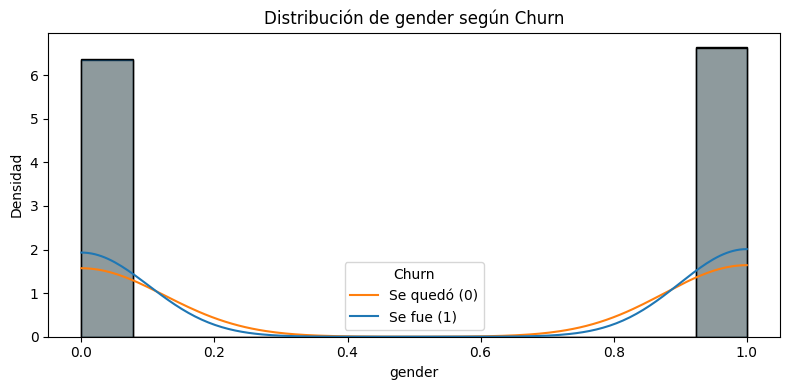

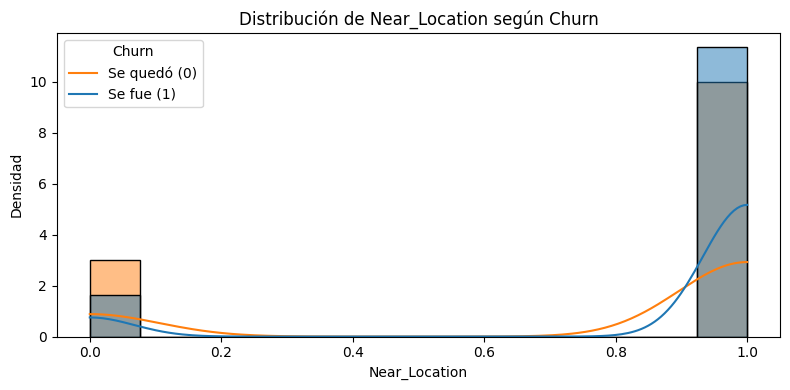

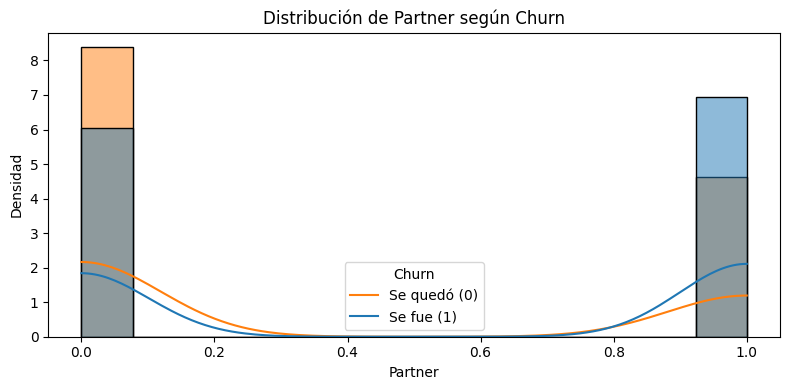

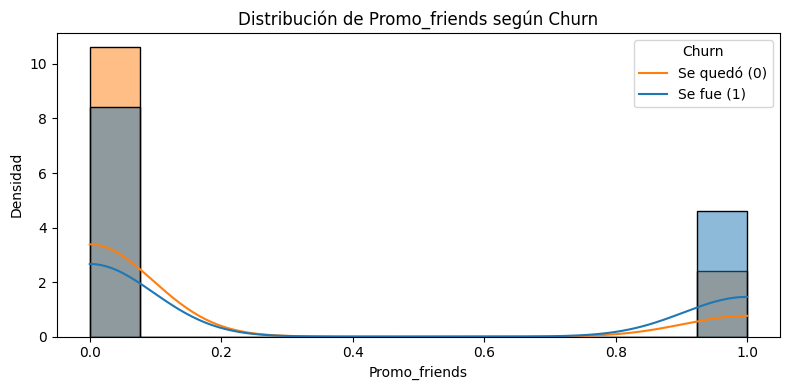

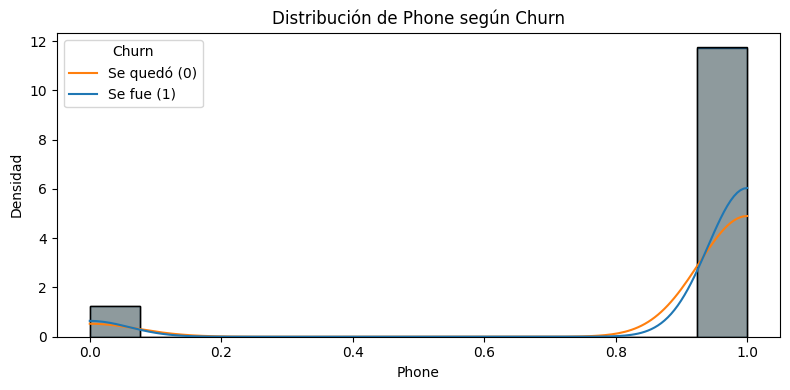

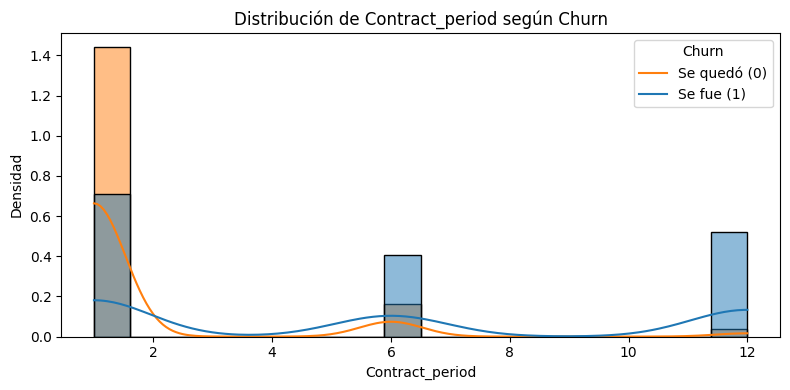

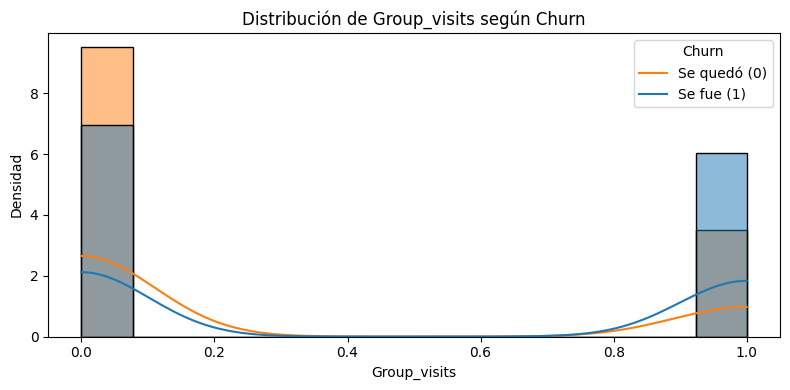

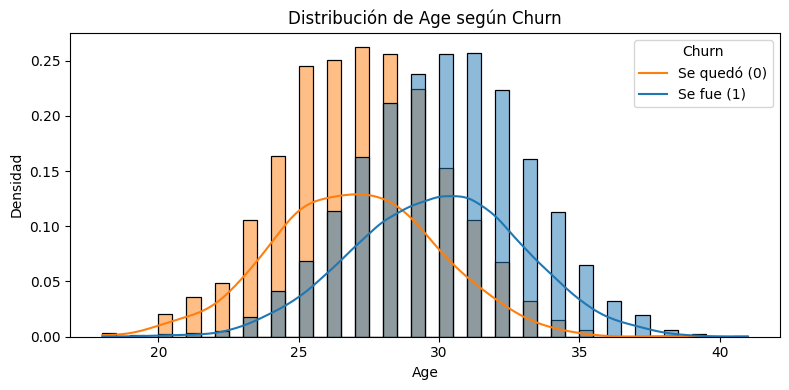

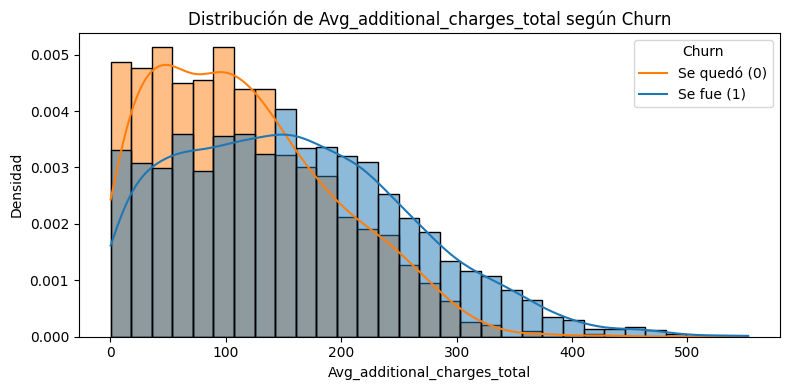

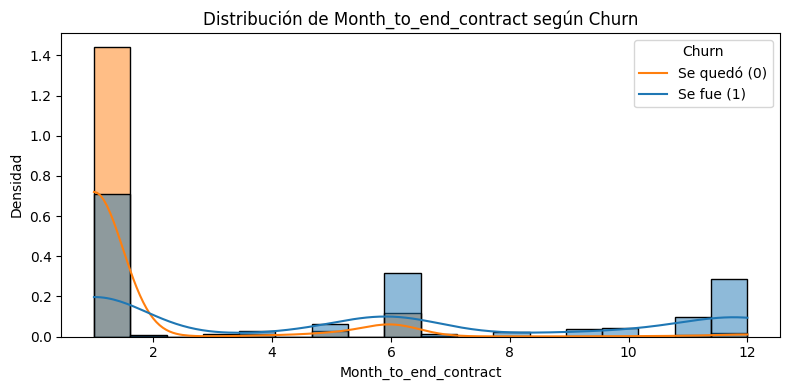

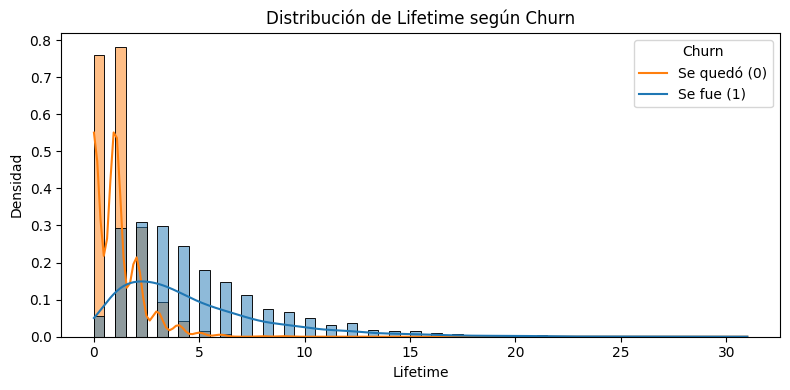

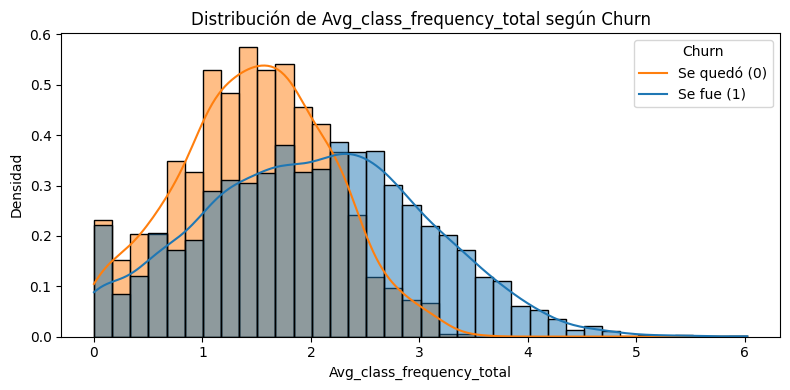

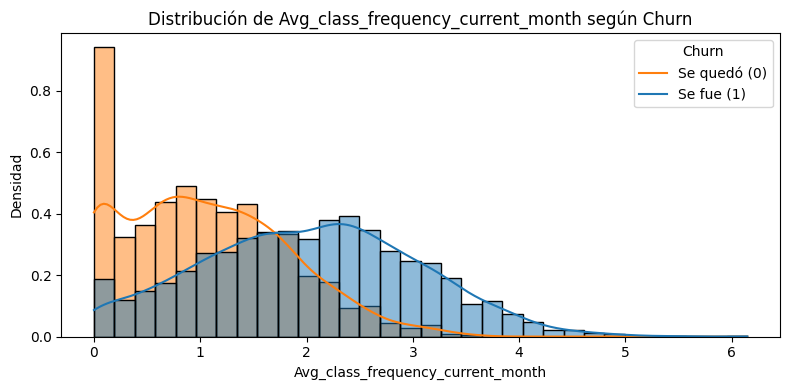

In [26]:
# Elimina la columna objetivo para iterar sobre las demás
for col in df.drop('Churn', axis=1).columns:
    plt.figure(figsize=(8, 4))
    sns.histplot(data=df, x=col, hue='Churn', kde=True, stat="density", common_norm=False)
    plt.title(f'Distribución de {col} según Churn')
    plt.xlabel(col)
    plt.ylabel('Densidad')
    plt.legend(title='Churn', labels=['Se quedó (0)', 'Se fue (1)'])
    plt.tight_layout()
    plt.show()

### Analisis de grafico por orden de aparición (arriba a abajo)

1. La proporcion de hombres y mujeres qyue se fueron y se quedaron esta cerca de ser balancada, 50-50
2. La mayorua de las personas en el dataset viven cerca del gimnasio
3. Hay mas personas en el gimnasio cuya empresa empleadora no tienen convenio con el gimnasio
4. La mayoria de la gente, de las que se fueron y de las que se quedaron, entro sin la promocion de amigo
5. Casi todos dieron su numero de celular al entrar al gimnasio
6. La mayoria de las personas, de las que se fueron y de las que se quedaron, tienen una suscripcion de 2 meses o menos
7. La mayoria de las personas, de las que se fueron y de las que se quedaron, no van a clases grupales
8. La distribucion de edades nos muestra que la edad promedio de las personas inscritas tiene una edad de entre 27 y 30 años en promedio
9. La gente que se fue tiende a gastar mas en cosas adicionales
10. La mayoria de la gente inscrita le queda de 2 meses o menos de inscripcion
11. La mayoria de la gente que se ha quedado en el gimnasio es nueva
12. La mayoria de la gente que se quedó va un promedio de 1 a 2 clases a la semana

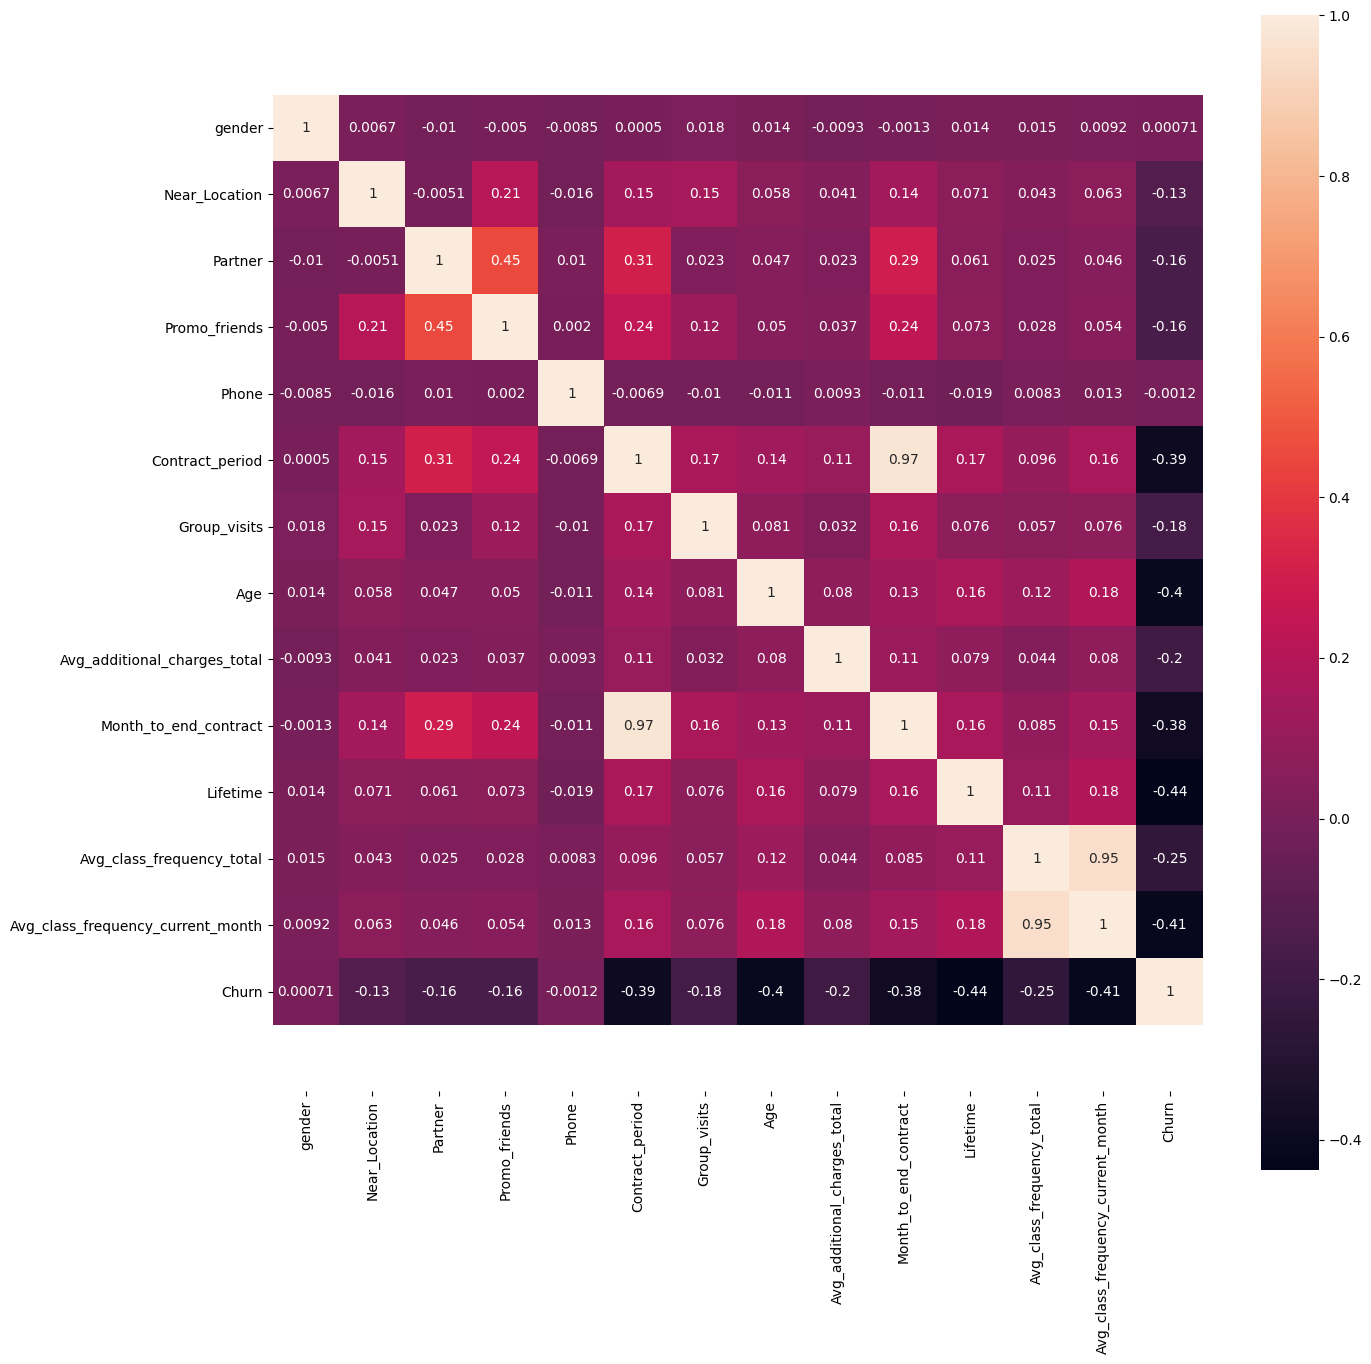

In [27]:
cm = df.corr()
fig, ax =  plt.subplots(figsize=(15, 15))

# traza el mapa de calor anotado para la matriz de correlación
sns.heatmap(cm, annot=True, square=True)
ax.set_ylim(15, 0)
plt.show()
## Construccion del modelo
X = df.drop(columns=['Churn'])
y = df['Churn']

### Analisis de la matriz de corrrelación

- Las variables mas fuertemente correlacionadas positivamente son contract period - month to end contract y promedio de clases totales - promedio de clases al mes. En ambos casos parece obvio que iba a ser así
- Las variables mas fuertemente correlacionadas negativamente son varias, de las que podemos concluir que las que mas afectan a que la gente se vaya o no son el periodo de contrato, la edad, el tiempo en el gimnasio y la cantidad mensual promedio de clases tomadas
- Con esta informacion podemos ver que varibles afectan positivamente a las que estan haciendo que churn sea mayor, por ejemplo mejorar la proporcion de gente que se inscribe porque su empresa es afiliada al gimansio podria incrementar el periodo del contrato

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 0 )

#Entrenamiento de los modelos
# crea un objeto StandardScaler y aplícalo al set de entrenamiento
scaler = StandardScaler()
X_train_st = scaler.fit_transform(X_train) # aplica la estandarización a la matriz de característica para el set de prueba

In [29]:
# aplica la estandarización a la matriz de característica para el set de prueba
X_test_st = scaler.transform(X_test)
#Lista de modelos
models = [LogisticRegression(), RandomForestClassifier()]


In [30]:
# la función que toma el modelo y los datos en las métricas input y output
def make_prediction(m, X_train, y_train, X_test, y_test):
    model = m
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print('Exactitud:{:.2f}, Precisión:{:.2f}, Recall:{:.2f} '.format(accuracy_score(y_test, y_pred), 
                                          precision_score(y_test, y_pred),
                                                                    recall_score(y_test, y_pred)))

In [31]:
# escribe un bucle que genere métricas según la lista de modelos
for i in models:
    print(i)
    make_prediction(m=i,X_train = X_train_st, y_train= y_train,
                    X_test=X_test_st, y_test = y_test)

LogisticRegression()
Exactitud:0.92, Precisión:0.85, Recall:0.83 
RandomForestClassifier()
Exactitud:0.92, Precisión:0.85, Recall:0.81 


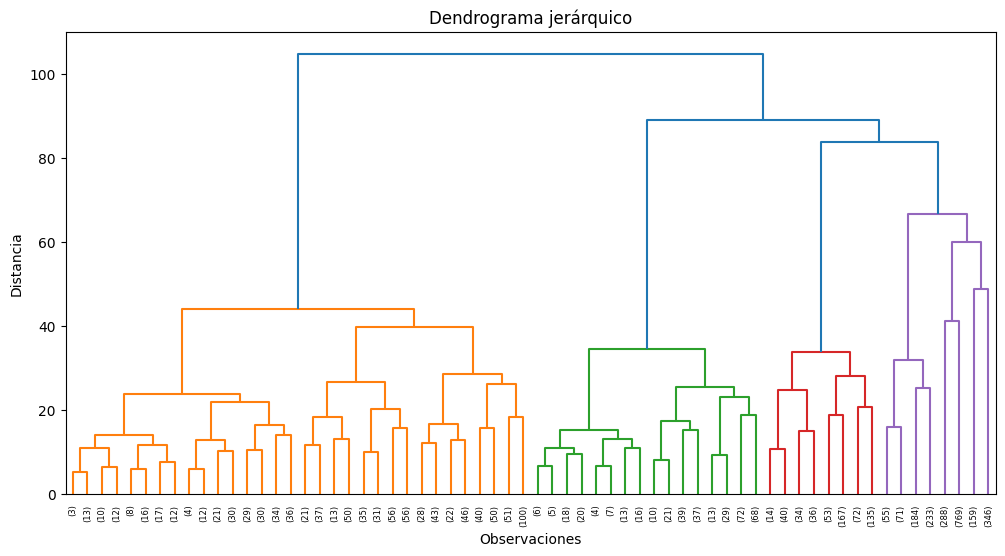

In [32]:
# Crear la matriz de distancias jerárquicas
X_sc = scaler.fit_transform(X)
Z = linkage(X_sc, method='ward')
plt.figure(figsize=(12, 6))
dendrogram(Z, truncate_mode='level', p= 5)
plt.title('Dendrograma jerárquico')
plt.xlabel('Observaciones')
plt.ylabel('Distancia')
plt.show()

In [36]:
#Entrenamiento de Kmeans
kmeans = KMeans(n_clusters=5, random_state=42, n_init=10)
kmeans.fit(X_sc)
# Predicciones de clúster para cada observación
cluster_labels = kmeans.labels_

In [37]:
# Agregar etiquetas al DataFrame original
df['KMeans_Cluster'] = cluster_labels
# Agrupar por clúster y obtener la media de las características
mean_values = df.groupby('KMeans_Cluster').mean(numeric_only=True)
print(mean_values)

                  gender  Near_Location   Partner  Promo_friends  Phone  \
KMeans_Cluster                                                            
0               0.502370       0.949447  0.829384       0.998420    1.0   
1               0.554556       0.849269  0.263217       0.052868    1.0   
2               0.499422       0.937572  0.737572       0.478613    1.0   
3               0.485738       0.718011  0.299919       0.018745    1.0   
4               0.523316       0.862694  0.471503       0.305699    0.0   

                Contract_period  Group_visits        Age  \
KMeans_Cluster                                             
0                      3.097946      0.448657  29.104265   
1                      2.606299      0.436445  30.008999   
2                     11.854335      0.546821  29.905202   
3                      1.914425      0.276284  28.083945   
4                      4.777202      0.427461  29.297927   

                Avg_additional_charges_total  Month_t

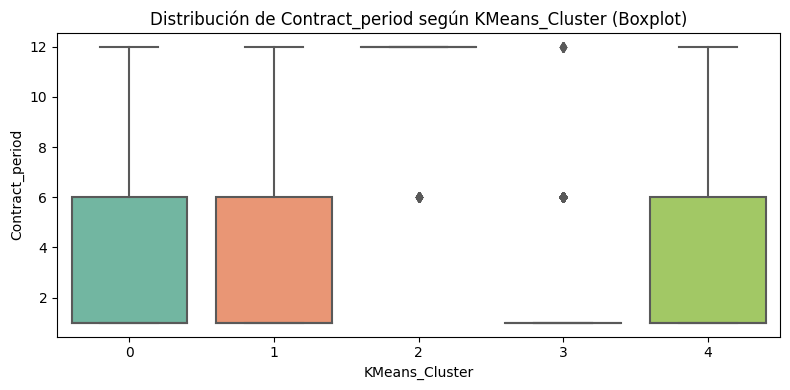

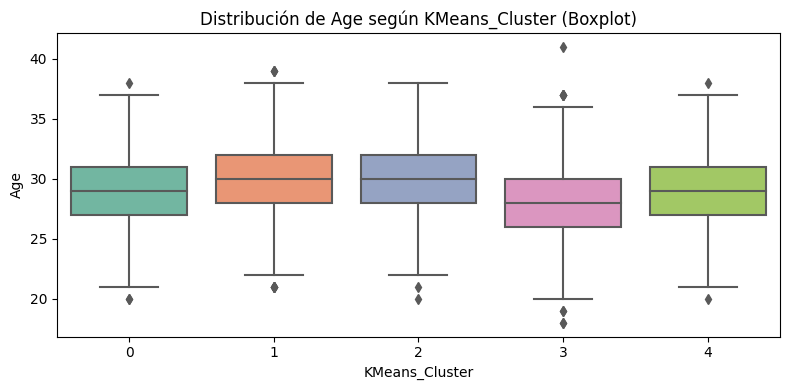

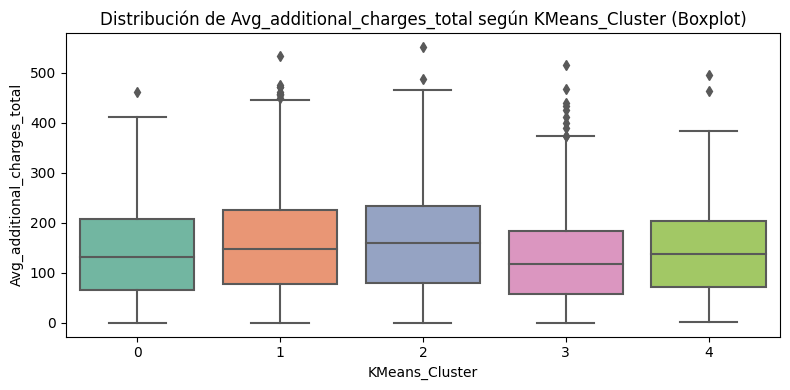

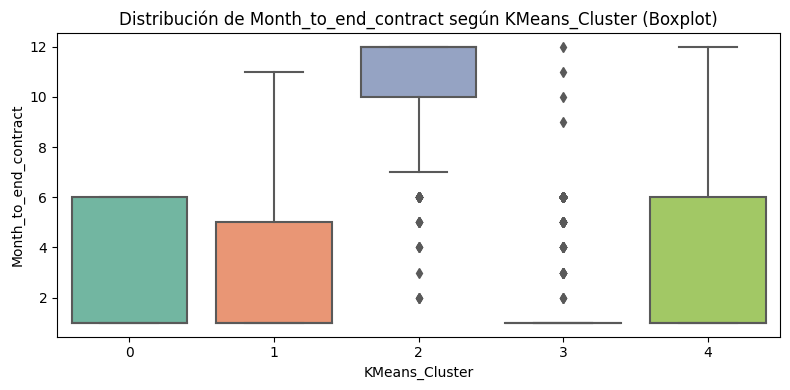

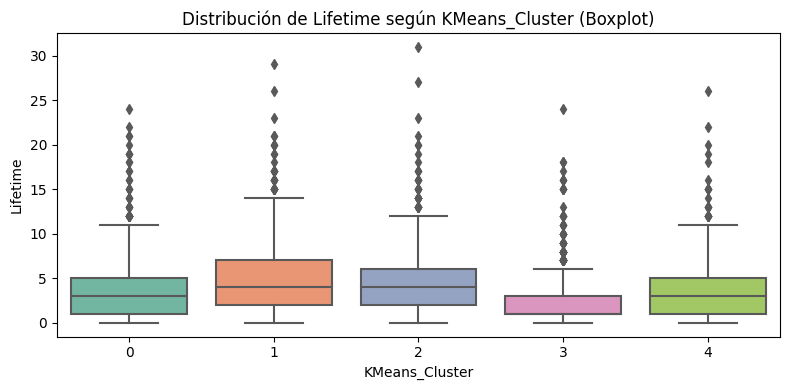

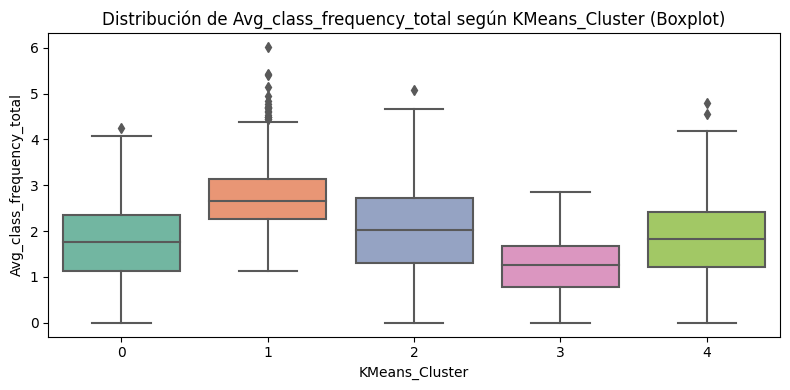

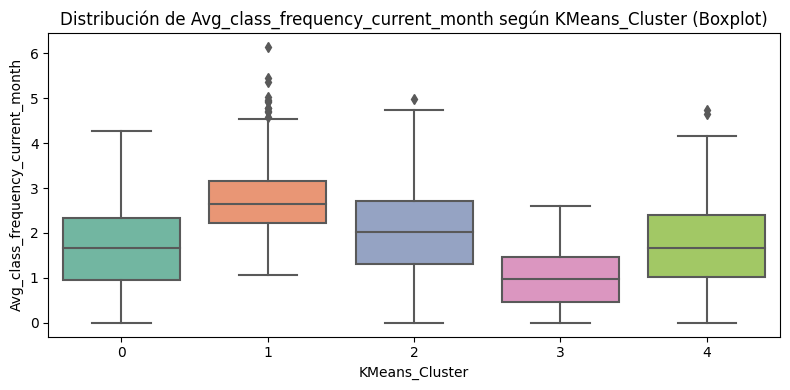

In [43]:
numeric_variables = [
    'Contract_period', 'Age', 'Avg_additional_charges_total',
    'Month_to_end_contract', 'Lifetime',
    'Avg_class_frequency_total', 'Avg_class_frequency_current_month'
]

for col in numeric_variables:
    plt.figure(figsize=(8, 4))
    sns.boxplot(data=df, x='KMeans_Cluster', y=col, palette='Set2')
    plt.title(f'Distribución de {col} según KMeans_Cluster (Boxplot)')
    plt.xlabel('KMeans_Cluster')
    plt.ylabel(col)
    plt.tight_layout()
    plt.show()


### Analisis de los graficos por orden de aparición (arriba a abajo)
- En cada cluster la gente tiene en promedio entre 2 a 6 meses de inscripcion, salvo en los clusteres 2 y 3 donde el promedio es de 12 y 0 respectivamente
- La distribucion de edades en todos los clusteres es parecida al igual que el de gastos totales, siendo el promedio 30 y 100-200 respectivamente
- La distribucion de contrato restante parece bastante coherente con la de contrato
- La mayoria de las personas en cada cluster no tiene mas de 5 meses en el gimnasio siendo las del cluster 3 las mas nuevas
- Las clases en promedio totales y por mes son casi identicas lo que es de esperarse debido a su correlacion que es casi de 1

In [39]:
# Calcula la tasa de cancelación promedio por clúster
cancel_rate = df.groupby('KMeans_Cluster')['Churn'].mean()
print(cancel_rate)

KMeans_Cluster
0    0.246445
1    0.089989
2    0.021965
3    0.572942
4    0.266839
Name: Churn, dtype: float64


## Conclusiones

- La tasa de cancelación mas pequeña esta en el cluster 4. De este cluster podemos observar que la mayoria vive cerca del gimnasio, son el cluster que en promedio asiste a clases en promedio, tanto en mensualmente como en recuento total y son los el grupo con mas longevidad. Por los datos encontrados podemos decir que el factor mas importante para esto es la cercania al gimnasio

- La tasa mas grande de cancelacion, asi como el cluster con mas cancelaciones en promedio es el cluster 3. En este caso puede ser que tengamos una contradiccion, ya que los datos nos dicen que todos viven cerca, no son el grupo ni con menos clases asistidas en promedio, mensual y total. Lo que podemos notar es que el promedio de meses a los que se inscribieron es el mas bajo, por lo que pudiesemos atribuir a la alta tasa de cancelacion es que estaban probando el ir al gimnasio

- Pasando al segundo grupo con mas cancelaciones en promedio, tenemos el cluster 0. Lo primero que salta a la vista es el promedio de cercacania al gimnasio, en las que el promedio dice que ninguno vive cerca del gimnasio, apoyando la hipotesis de que el factor mas importante de retencion es la cercania al gimnasio.

- Otra cosa que resaltar esta en el cluster 1, que es el segundo cluster en el que menos cancelaciones hay y en el que podemos ver que es el cluster con mayor diferencia (y mucha) en el numero de meses inscrito en el cual vemos que el promedio es de casi un año, son tambien los que mas visitas en grupo tienen y de los que mas entraron cuando la empresa donde trabajan tiene afiliacion con el gimnasio. Este cluster es el segundo en longevidad en el gimnasio. Salvo por la cantidad de meses y longevidad, podemos ver una tendencia similar en el tercer grupo con menos cancelaciones, el cluster 2.

En conclusion, podemos decir cual es el factor mas importante para la retencion de personas, la cercacinia al gimnasio parace ser la principal. Sin embargo, eso no esta en nuestro control. Aun asi hay otros factores que si lo estan y que viendo los datos nos indican que podrian ser areas que se pueden aprovechar para una mayor retencion. Identificamos que la empresa donde trabajen este afiliada al gimnasio, que la cantidad de meses a la que se inscriben sea alta (probablemente porque no quieran "perder el dinero invertido"), y las actividades grupales. Otra razon que encontramos pero que no se ve reflejada tanto en los datos es la de entrar en promocion con un amigo.

Con las razones que si estan en nuestro alcance de accion recomiendo que:
- Se busquen mas convenios con empresas 
- Se promocionen y que haya promocion cuando se inscriban mas de 3 meses en un solo pago, o apartir de cierto tiempo consecutivo en el gimnasio
- Que se promocionen y se sigan impartiendo clases grupales. Tambien podria ser bueno una encuesta para conocer si se esta satisfecho con las clases que se imparten o si se pudiesen incluir otras 

